# Chapter 6 - Decision Trees
"_Decision Trees_ are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks." [Geron2017]

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
    
import numpy as np

np.random.seed(42) # to ensure our results exactly like the book

## 6. 1 Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

### 6.1.1 Determine Targets

In [3]:
X = iris.data[:, 2:] # only focus on petal length and width
Y = iris.target
feature_names = iris.feature_names[2:]
print("given:",feature_names, 
      "\npredict whether:", iris.target_names)


given: ['petal length (cm)', 'petal width (cm)'] 
predict whether: ['setosa' 'versicolor' 'virginica']


In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 6.1.2 Visualization

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
                out_file="iris_tree.dot",
                feature_names=feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [6]:
!dot -Tpng iris_tree.dot -o iris_tree.png

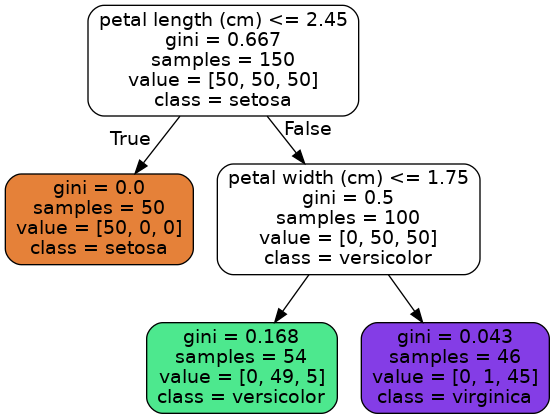

In [7]:
from IPython.display import Image
Image(filename='iris_tree.png') 

### 6.1.3 Plot training data set

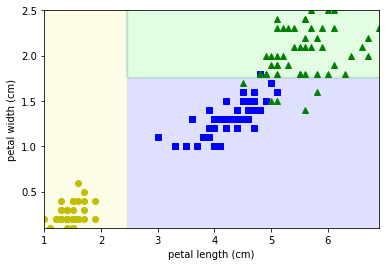

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
CUSTOM_CMAP = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
def plot_decision_boundary(clf, x, y):
    color_map = ["yo", "bs", "g^"]
    for target_index, target_name in enumerate(iris.target_names):
        plt.plot(x[:, 0][y==target_index], # petal length on X axis (the ones that equal to target)
                 x[:, 1][y==target_index], # petal width on Y axis (the ones that equal to target)
                 color_map[target_index], 
                 label=target_name)
        
    x1s = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
    x2s = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_test = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_test).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=CUSTOM_CMAP)

plot_decision_boundary(tree_clf, X, Y)

plt.xlabel(feature_names[0]) # petal length (cm)
plt.ylabel(feature_names[1]) # petal width (cm)
plt.show()

### Exercise 6.1: Plot decision boundaries
1. Write down which colour correspond to which node in the decision tree.
2. Try to increase/decrease `max_depth` of decision tree classifier and observe the changes in the decision boundaries. What would you set `max_depth`?
3. If the helper function was not available to you, how would you visualize the decision boundaries? (Tip: what if you generate a large amount of samples covers all the space)

### Exercise 6.1a: Solution

In [9]:
# Tip: try each point in the space 




### 6.1.4 Estimating Class Probabilities
To estimate the probability of an instance belongs to a class, you can use `predict_proba`, to determine the class that an instance will be assigned to use `predict`. 

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.1.5 Regularization Hyperparameters
To avoid overfitting, you can limit the generation of a node by `min_samples_leaf`(the minimum samples that a node must have to able to be splitted.). 

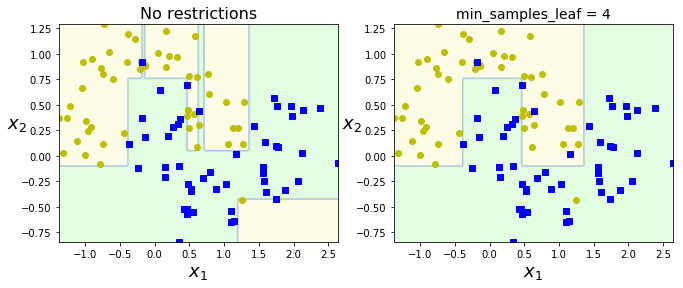

In [12]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf1, Xm, ym)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf2, Xm, ym)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)


plt.show()

## 6.2 Regression

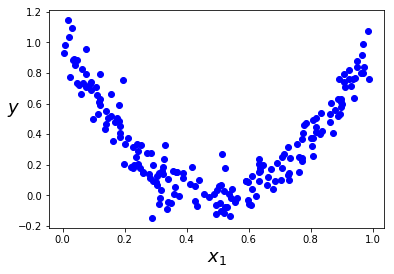

In [13]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
Y = y + np.random.randn(m, 1) / 10

plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Exercise 6.2: Visualize the regression tree 

1. Visualize this regression tree as we visualized the decision tree
2. Plot the decision boundaries of `max_depth=2` and `max_depth=3` regression trees
3. Plot the decision boundaries of `no restrictions` and `min_samples_leaf=10` regression trees on the same data

# Chapter 7: Esemble Learning and Random Forests

Instead of using a single predictor, to improve our predictions we use now use _an esemble_: **a group of predictors**. It is as if you are asking a number of experts opinion about a problem and you aggregate their answers.

## 7.1 Voting Classifiers

A brief comparision between `soft` voting and `hard` voting with using three predictors.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

Helper function for printing accuracies on test set

In [32]:
from sklearn.metrics import accuracy_score
def test_clfs(*clfs): # clf -> classifier
    for clf in clfs:
        clf.fit(X_train, Y_train) # train the classifier
        Y_pred = clf.predict(X_test)
        print(clf.__class__.__name__ + ":", accuracy_score(Y_test, Y_pred))

Let's test `hard` voting first.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Don't worry about the warnings, 
# sci-kit community will be fixing it in the next major version 0.20.0 
    
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), 
                                          ('rf', rnd_clf), 
                                          ('svc', svm_clf)],
                              voting='hard')
test_clfs(log_clf, rnd_clf, svm_clf, voting_clf)

LogisticRegression: 0.864
RandomForestClassifier: 0.872
SVC: 0.888
VotingClassifier: 0.896


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Exercise 7.1: Which voting to pick?
1. Check the `soft` voting and compare the results. Why do you think it is different? 

_If you don't know the difference have a look at your book, page 186._

## 7.2 Bagging & Pasting
Instead of giving training set to each predictor in our esemble, another approach to gain more accuracy is to separate the training set and give a different training subset to each predictor. There are two ways: 
* **Bagging:** (_bootstrapping in statistics_) picking a random subset from training set and not removing this selected set from training set for each predictor, i.e. **sampling with replacement**
* **Pasting:** picking a random subset from training set and removing this selected set from the training set for each predictor, i.e. **sampling without replacement**
If you are still confused, have a look at [here](http://www.statisticshowto.com/sampling-with-replacement-without/).

Bagging Classifier
0.904
Decision Tree Classifier
0.856


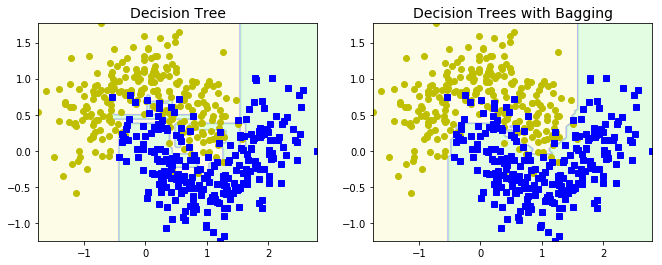

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# define our decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
# 500 copies of the predictor, which has 100 samples from training set
# n_jobs=-1 for utilizing all cores 
bag_clf = BaggingClassifier(tree_clf, 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)

# fit the bagging classifier
bag_clf.fit(X_train, Y_train)
tree_clf.fit(X_train, Y_train)

Y_pred_bag = bag_clf.predict(X_test)
Y_pred_tree = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Bagging Classifier")
print(accuracy_score(Y_test, Y_pred_bag))
print("Decision Tree Classifier")
print(accuracy_score(Y_test, Y_pred_tree))

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()